In [92]:
from myhdl import *
from myhdlpeek import Peeker


def memory(memWrite, clck, memRead, address, writeData, readData):
    @always(clck.negedge)
    def writeBehave():
        if(memWrite == 1):
            arrayA[address] = int(writeData)
    
    @always(memRead, address)
    def readBehave():
        if(memRead == 1):
            readData.next = arrayA[address]
    
    return writeBehave, readBehave

def MUX(A, B, C, D):
    @always(A, B, C)
    def MUXBehave():
        if(C == 0):
            D.next = A
        else:
            D.next = B
    return MUXBehave
        
    



0 0 False
0 0 False
0 0 False
0 0 False
False 1
4913 0 1
1 1
4885 0 1
1 1
16501 0 1
0 0 0
0 0 0
10930 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 1
7976 0 1
-5359 0 0
-15 0 0
22496 0 0
0 1
2710 -5359 1
10611 0 0
0 1
10397 0 1
1 1
19706 0 1
0 0 0
-5261 -5359 0
-18700 0 0
0 0 0
0 0 0
10596 10611 0
17865 0 0
0 1
2682 0 1
13278 0 0
-15970 10611 0
15970 -15970 0
-5 0 0
0 0 0
17865 0 0
-3267 -18700 0
21329 -5359 0
0 0 0
0 0 0


<class 'myhdl.StopSimulation'>: No more events


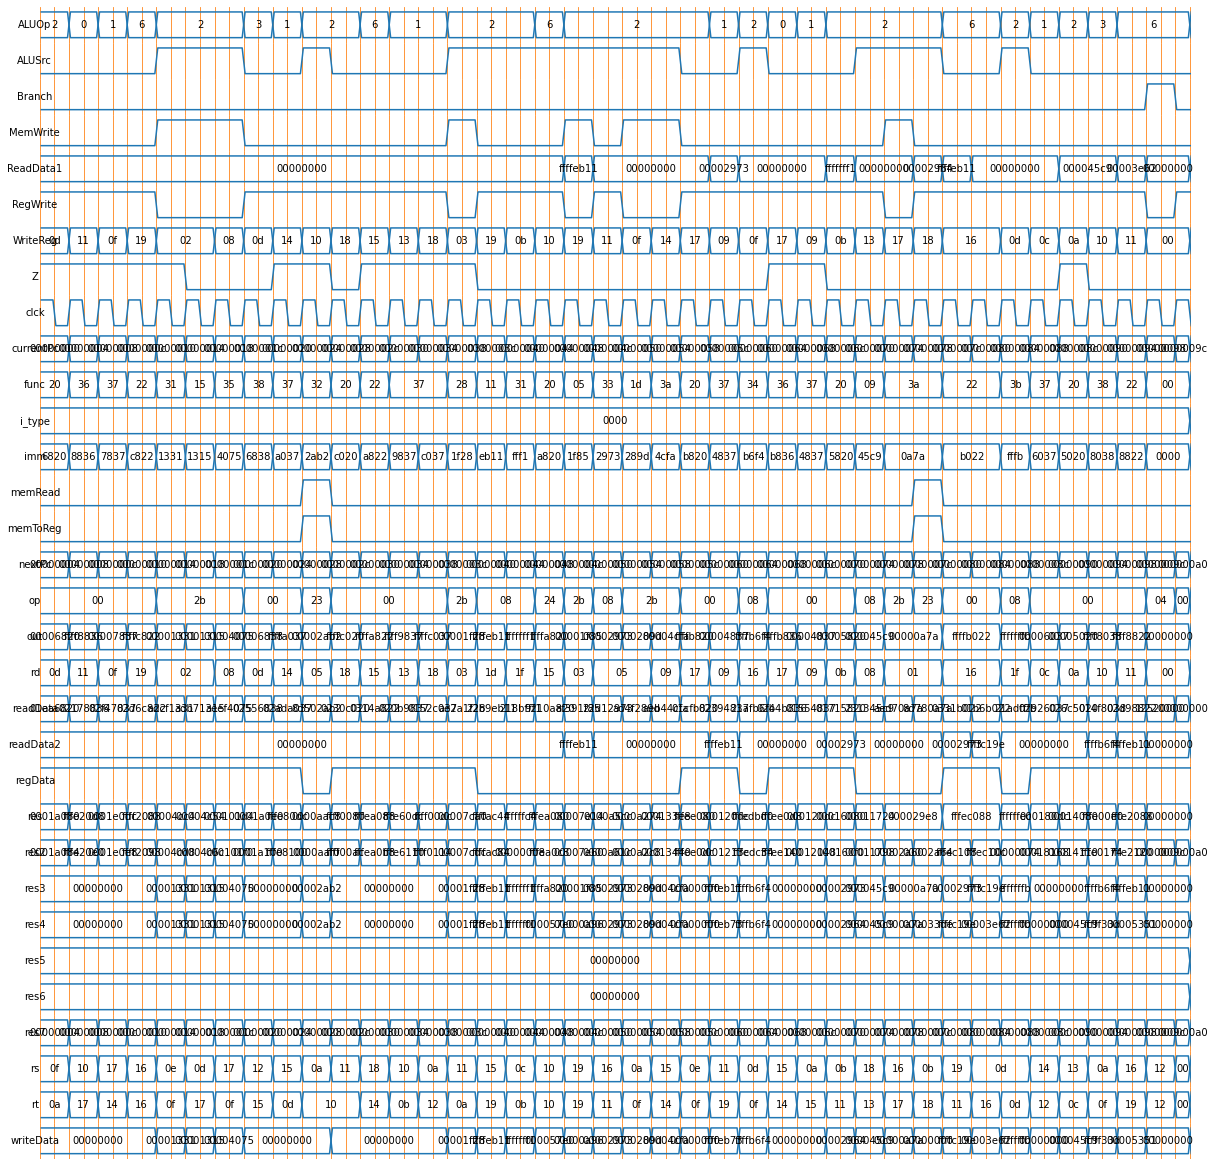

In [101]:
from myhdl import *

##array = [intbv(0)[32:] for i in range(2**10)]
def insMemory(currentPC, readData):
            
    @always(currentPC)
    def readInsBehave():
        
        if(currentPc//4 < len(array)):
            
            readData.next = intbv(array[currentPC//4])
        else:
            readData.next = 0
    
    return readInsBehave
          
          
def adder(currentPC, a, nextPC):
    
    @always(currentPC,a)
    def adder_behave():
        nextPC.next = currentPC + a
        
    return adder_behave

def pc(currentPC, clck, nextPC):
    @always(clck.posedge)
    def pc_behave():
        currentPC.next = nextPC
    return pc_behave

# def tb():
#     clck = Signal(bool(0))
#     currentPc = Signal(intbv(0)[32:])
#     nextPc = Signal(intbv(0)[32:])
#     Peeker(currentPc , 'currentPc')
#     Peeker(nextPc , 'nextPc')
    
#     PC = pc(currentPc, clck, nextPc)
    
#     def test():
#         for _ in  range (8):
#             clck.next = not clck
#             yield delay(1)
#     return instances()

# Peeker.clear()
# sim=Simulation(tb() , *Peeker.instances())
# sim.run()
# Peeker.show_waveforms()
# Peeker.to_html_table()
# Peeker.clear()

def test():
    for _ in  range (80):
        clck.next = not clck
        yield delay(1)

Peeker.clear()
filename = "C:\\Users\\Lenovo\\Desktop\\MM1\\instructions.txt.txt"
array = readfile(filename)
registers = [0 for i in range (32)]
arrayA = [0 for i in range(2**20)]

clck = Signal(bool(0))
currentPc = Signal(intbv(4)[32:])
nextPc = Signal(modbv(0)[32:])
readData = Signal(intbv(0)[32:])
readData1, readData2 = [Signal(intbv(0)[32:].signed()) for i in range (2)]
regDst, RegWrite, ALUSrc, MemWrite, memRead, memToReg, Branch = [Signal(bool(0)) for i in range (7)]
ALUOp = Signal(intbv(0)[3:])
i_type = Signal(intbv(0)[16:])
writeData = Signal(intbv(0)[32:].signed())
writeReg = Signal(intbv(0)[5:])
op = Signal(intbv(0)[6:])
rs = Signal(intbv(0)[5:])
rt = Signal(intbv(0)[5:])
rd = Signal(intbv(0)[5:])
imm = Signal(intbv(0)[16:])
func = Signal(intbv(0)[6:])
out = Signal(intbv(0)[32:].signed())
ALUOp = Signal(intbv(0)[3:])
res3 = Signal(intbv(0)[32:].signed())
Z= Signal(bool(0))
res4 = Signal(intbv(0)[32:].signed())
res5 = Signal(intbv(0)[32:].signed())
res = Signal(intbv(0)[32:].signed())
res2 = Signal(modbv(0)[32:])
res6 = Signal(intbv(0)[32:])
res7 = Signal(intbv(0)[32:])

PC = pc(currentPc, clck, nextPc)
Adder = adder(currentPc, Signal(intbv(4)), res7)
InstMem = insMemory(currentPc, readData)
InstSplit = instSplit(readData, op , rs , rt , rd , imm , func)
ContUnit = contUnit(op, func, regDst, Branch, memRead, memToReg, ALUOp, MemWrite, ALUSrc, RegWrite)
mux1 = MUX(rt, rd, regDst, writeReg)
RegFile = regFile(rs, rt, writeData, RegWrite, writeReg, clck, readData1, readData2)
SignExtend = signextend(imm, out)
mux3 = MUX(readData2, out, ALUSrc, res3)
alu = ALU(readData1, res3 , ALUOp , Z ,res4 )
mem = memory(MemWrite , clck ,  memRead , res4 , readData2 , res5 )
mux4=MUX(res4 , res5 , memToReg, writeData)
ShiftLeft = shiftLeft2(out, res)
Adder2 = adder(res7, res, res2)
AndBlock = And(Branch , Z , res6)
mux2 = MUX(res7, res2, res6, nextPc)

Peeker(res7 , 'res7')
Peeker(i_type , 'i_type')
Peeker(out , 'out')
Peeker(clck, "clck")
Peeker(readData , 'readData')
Peeker(currentPc, "currentPc")
Peeker(nextPc, "nextPc")
Peeker(op , 'op')
Peeker(rs , 'rs')
Peeker(rt, 'rt')
Peeker(rd , 'rd')
Peeker(imm , 'imm')
Peeker(func , 'func')
Peeker(writeData , 'writeData')
Peeker(regDst , 'regData')
Peeker(RegWrite , 'RegWrite')
Peeker(ALUSrc , 'ALUSrc')
Peeker(MemWrite , 'MemWrite')
Peeker(memRead , 'memRead')
Peeker(memToReg , 'memToReg')
Peeker(Branch, 'Branch')
Peeker(ALUOp , 'ALUOp')
Peeker(writeReg , 'WriteReg')
Peeker(readData1 , 'ReadData1')
Peeker(readData2 , 'readData2')
Peeker(res3 , 'res3')
Peeker(Z , 'Z')
Peeker(res4 , 'res4')
Peeker(res5 , 'res5')
Peeker(res, 'res')
Peeker(res2 , 'res2')
Peeker(res6 , 'res6')

Simulation(PC , Adder , InstMem ,InstSplit,ContUnit, mux1,RegFile , SignExtend ,alu , mux3 , mem ,mux4 ,ShiftLeft , Adder2, AndBlock , mux2 , test(),*Peeker.instances()).run()
Peeker.show_waveforms(width = 20)
Peeker.clear()
    
    

In [103]:
def contUnit(opCode, ALUCont, regDst, Branch, memRead, memToReg, ALUOp, memWrite, ALUSrc, regWrite): 
    @always(opCode, ALUCont)
    def contUnitBehave():
        if(opCode == 0):
            regDst.next = 1
            regWrite.next = 1
            ALUSrc.next = 0
            memWrite.next = 0
            memRead.next = 0
            memToReg.next = 0
            Branch.next = 0
            if(ALUCont == 32):
                ALUOp.next = 2
            elif(ALUCont == 34):
                ALUOp.next = 6
            elif(ALUCont == 54):
                ALUOp.next = 0
            elif(ALUCont == 55):
                ALUOp.next = 1
            elif(ALUCont == 56):
                ALUOp.next = 3
        elif(opCode == 8):
            regDst.next = 0
            regWrite.next = 1
            ALUSrc.next = 1
            ALUOp.next = 2
            memWrite.next = 0
            memRead.next = 0
            memToReg.next = 0
            Branch.next = 0
        elif(opCode == 36):
            regDst.next = 0
            regWrite.next = 1
            ALUSrc.next = 1
            ALUOp.next = 6
            memWrite.next = 0
            memRead.next = 0
            memToReg.next = 0
            Branch.next = 0
        elif(opCode == 35):
            regDst.next = 0
            regWrite.next = 1
            ALUSrc.next = 1
            ALUOp.next = 2
            memWrite.next = 0
            memRead.next = 1
            memToReg.next = 1
            Branch.next = 0
        elif(opCode == 43):
            regWrite.next = 0
            ALUSrc.next = 1
            ALUOp.next = 2
            memWrite.next = 1
            memRead.next = 0
            Branch.next = 0
        elif(opCode == 4):
            regWrite.next = 0
            ALUSrc.next = 0
            ALUOp.next = 6
            memWrite.next = 0
            memRead.next = 0
            Branch.next = 1
    return contUnitBehave         
            
    

In [72]:
def signextend (i_type , out):
    
    @always(i_type)
    def signbehave():
        out.next = i_type.signed()
    return signbehave
    

In [35]:
def readfile(filename):
    fileobj= open(filename , "r")
    array=fileobj.read().splitlines()
    fileobj.close()
    return array
##readfile("Path")

In [50]:
def instSplit(inst , op , rs , rt , rd , imm , func):
    @always(inst)
    def instSplitbehave():
        op.next=inst[32:26]
        rs.next=inst[26:21]
        rt.next=inst[21:16]
        rd.next=inst[16:11]
        func.next=inst[6:0]
        imm.next=inst[16:0]
    return instances()

    
       
        
    

In [90]:
def regFile(readReg1, readReg2, writeData, regWrite, writeReg, clck, readData1, readData2):
    
    @always(readReg1, readReg2)
    def regFileBehave():
        readData1.next = intbv(registers[readReg1])
        readData2.next = intbv(registers[readReg2])
        
    @always(clck.negedge)
    def writeBehave():
        if(regWrite == 1):
            registers[writeReg] = int(writeData)
            
    return instances()




    

In [38]:
def shiftLeft2(signExtend, res):
    @always(signExtend)
    def shiftLeft2Behave():
        res.next = (signExtend<<2)[32:].signed()
    return shiftLeft2Behave

        

In [25]:
def ALU(a, b, op, zero, res):
  
   
    
    
    @always(a,b,op)
    def ALU_behave():
        
        
         
        if(op == 0):
            res.next = a&b
            
        elif(op == 1):
            res.next = a|b
            
        elif(op == 2):
            res.next = a+b
            
        elif(op == 3):
            res.next = a^b
            
        elif(op == 6):
            res.next = a-b
        
        if(res == 0):
            zero.next = 1
        else:
            zero.next = 0            
            
            
            
    return instances()

In [43]:
#def tb():

filename = "C:\\Users\\Lenovo\\Desktop\\MM1\\instructions.txt.txt"
array = readfile(filename)

clck = Signal(bool(0))
currentPc = Signal(intbv(0)[32:])
nextPc = Signal(intbv(0)[32:])
readData = Signal(intbv(0)[32:])
op = Signal(intbv(0)[6:])
rs = Signal(intbv(0)[5:])
rt = Signal(intbv(0)[5:])
rd = Signal(intbv(0)[5:])
imm = Signal(intbv(0)[16:])
func = Signal(intbv(0)[6:])
memWrite, memRead = [Signal(bool(0)) for i in range(2)]
address,readData = [Signal(intbv(0)[32:]) for i in range(2)]     ###--------------------->....>
regDst, RegWrite, ALUSrc, MemWrite, memRead, memToReg, Branch = [Signal(bool(0)) for i in range (7)]
ALUOp = Signal(intbv(0)[3:])
i_type = Signal(intbv(0)[16:])
out = Signal(intbv(0)[32:])
writeData = Signal(intbv(0)[32:])
writeReg = Signal(intbv(0)[5:])
readData1, readData2 = [Signal(intbv(0)[32:]) for i in range (2)]
res = Signal(intbv(0)[32:])
res2 = Signal(intbv(0)[32:])
res3 = Signal(intbv(0)[32:])
Z= Signal(bool(0))
res4 = Signal(intbv(0)[32:])
##And = Z&Branch --------------------?????
res5 = Signal(intbv(0)[32:])
res6 = Signal(bool(0))
Peeker(currentPc , 'currentPc')
Peeker(nextPc , 'nextPc')
Peeker(readData , 'readData')
Peeker(op , 'op')
Peeker(rs , 'rs')
Peeker(rt, 'rt')
Peeker(rd , 'rd')
Peeker(imm , 'imm')
Peeker(func , 'func')
Peeker(memWrite , 'memWrite')
Peeker(memRead , 'memRead')
Peeker(address , 'address')
Peeker(writeData , 'writeData')
Peeker(readData , 'readData')
Peeker(regDst , 'regData')
Peeker(RegWrite , 'RegWrite')
Peeker(ALUSrc , 'ALUSrc')
Peeker(MemWrite , 'MemWrite')
Peeker(memRead , 'memRead')
Peeker(memToReg , 'memToReg')
Peeker(Branch, 'Branch')
Peeker(ALUOp , 'ALUOp')
Peeker(i_type , 'i_type')
Peeker(out , 'out')
Peeker(writeReg , 'WriteReg')
Peeker(readData1 , 'ReadData1')
Peeker(readData2 , 'readData2')
Peeker(res, 'res')
Peeker(res2 , 'res2')
Peeker(res3 , 'res3')
Peeker(Z , 'Z')
Peeker(res4 , 'res4')
Peeker(res5 , 'res5')
Peeker(res6 , 'res6')



PC = pc(currentPc, clck, nextPc)
Adder = adder(currentPc, Signal(intbv(4)), nextPc)
InstMem = insMemory(currentPc, readData)
InstSplit = instSplit(readData, op , rs , rt , rd , imm , func)
ContUnit = contUnit(op, func, regDst, Branch, memRead, memToReg, ALUOp, MemWrite, ALUSrc, RegWrite)
mux1 = MUX(rt, rd, regDst, writeReg)
RegFile = regFile(rs, rt, writeData, RegWrite, writeReg, clck, readData1, readData2)
SignExtend = signextend(imm, out)
ShiftLeft = shiftLeft2(out, res)
Adder2 = adder(nextPc, res, res2)
AndBlock = And(Branch , Z , res6)
mux2 = MUX(nextPc, res2, res6, currentPc)
mux3 = MUX(readData2, out, ALUSrc, res3)
alu = ALU(readData1, res3 , ALUOp , Z ,res4 )
mem = memory(MemWrite , clck ,  memRead , res4 , readData2 , res5 )
mux4=MUX(res5 , res4 , memToReg, writeData)

def test():
    for _ in  range (8):
        clck.next = not clck
        yield delay(1)

    #return instances()




# Create a simulator for the multiplexer, test process and the peekers.
Simulation(PC, test(), *Peeker.instances()).run()

# Run the simulation.


# Display the complete waveforms captured by all the Peekers.
Peeker.show_waveforms()

# Clear the Peekers for the next simulation.
Peeker.clear()
    

    
    
    

<class 'myhdl.StopSimulation'>: No more events


IndexError: list index out of range

In [15]:
def And(x , y , z):
    @always_comb
    def andB():
        z.next=x&y
    return andB  
        

In [102]:
print(registers)
print(arrayA[2710])
for line in arrayA:
    if line!=0: print(line)
print (len(registers))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 17865, 10596, 0, -5, 0, -18700, -3267, 21329, 0, 17865, 0, 0, 15970, 0, 0, -5359, 0, 0, 0, 0, 0, 0]
-5359
-5359
32
